In [1]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

from cycler import cycler
import matplotlib.cm as cm

# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)

%matplotlib widget

/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_5036/1886163394.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [2]:
hits = pd.read_hdf("../config/NextTon_0nubb_Efilt.h5", "MC/hits")

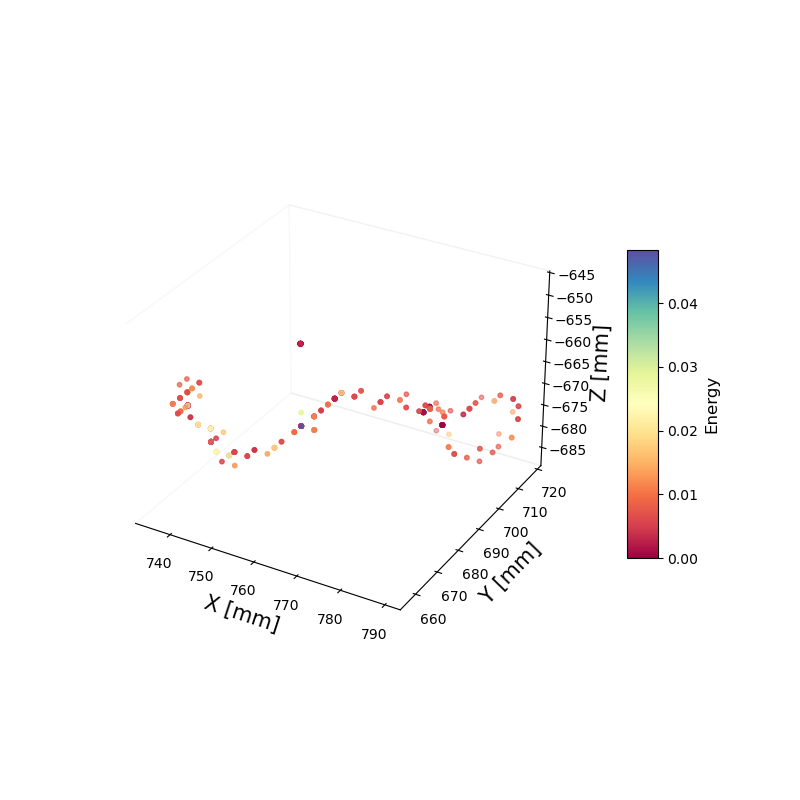

In [7]:

event_hits = hits[hits.event_id == 39338]

fig = plt.figure(figsize=(8, 8))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('white')
ax.set_facecolor('white')

# Scatter plot in 3D
sc = ax.scatter(event_hits.x, event_hits.y, event_hits.z, 
                c=event_hits.energy, cmap='Spectral', s=10, label="Reco hits")

ax.set_xlabel("X [mm]", fontsize=15, color='black')
ax.set_ylabel("Y [mm]", fontsize=15, color='black')
ax.set_zlabel("Z [mm]", fontsize=15, color='black')

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.zaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='z', colors='black')

# ax.set_title(title, fontsize=15, color='black')

ax.grid(False)

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10, pad=0.09)
cbar.set_label("Energy", fontsize=12, color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_5036/2034855972.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

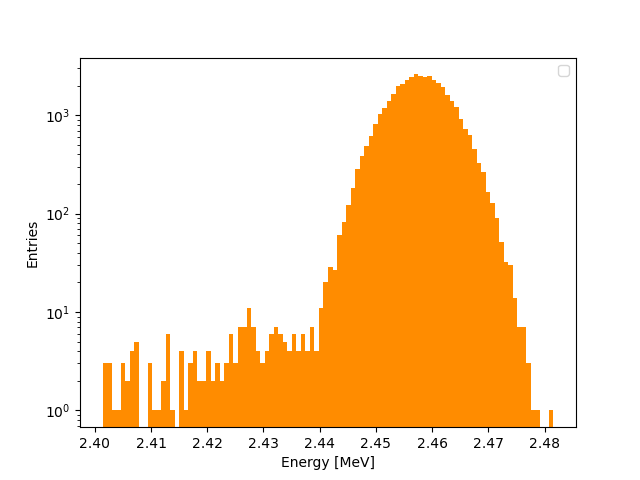

In [6]:
# Get the hit tables and plot the total energy deposited in the TPC
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')


plt.figure()

plt.hist(hit_tot_energy.hit_tot_energy, bins=100, color=['darkorange']);

plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.semilogy()
